In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#import dataset
df=pd.read_csv('data_banknote',header=None)

In [6]:
df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
df[4].unique()

array([0, 1], dtype=int64)

In [8]:
#Lets give name to columns according to data set description
df.columns=["variance","skewness","curtosis","entropy","class"]

In [9]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [11]:
#check missing values
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

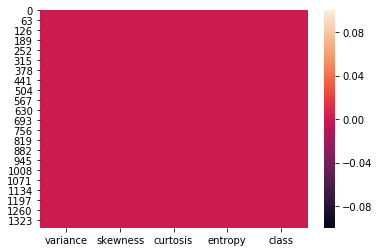

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


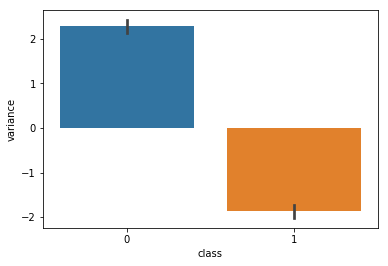

In [38]:
sns.barplot(x='class',y='variance',data=df)

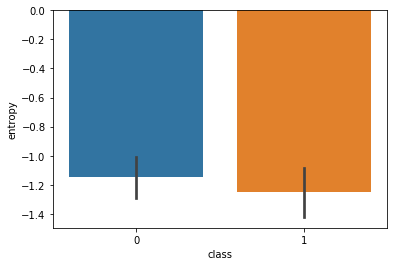

In [39]:
sns.barplot(x='class',y='entropy',data=df)

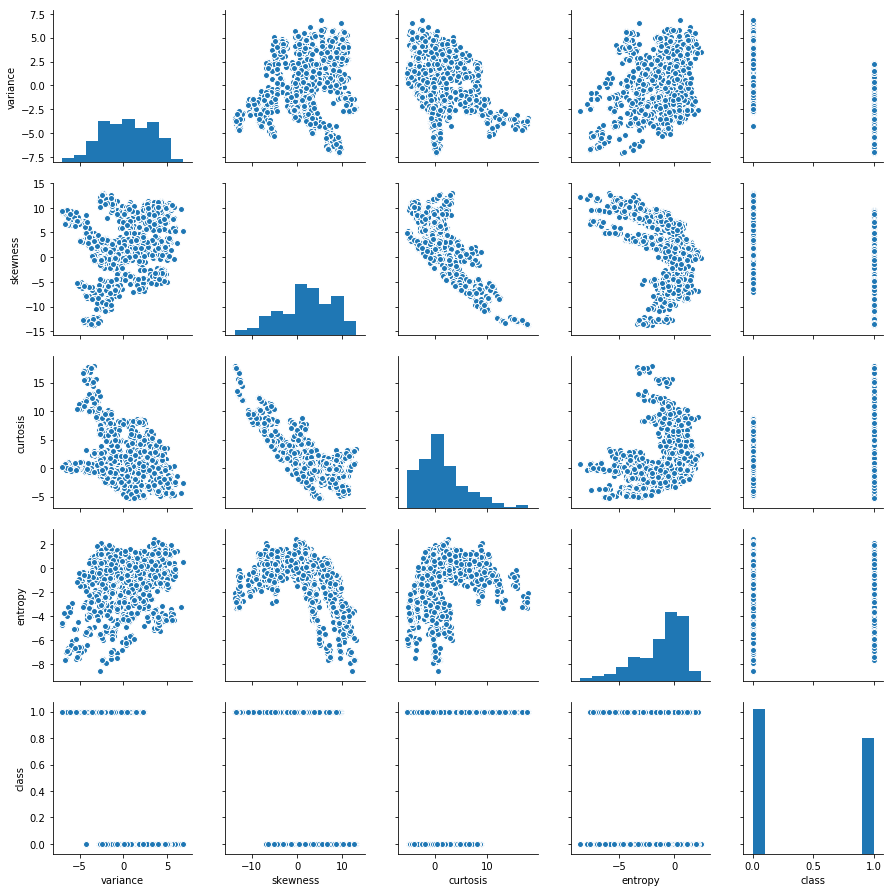

In [15]:
sns.pairplot(df)

In [17]:
#split the data in x and y 
x=df.iloc[:,:-1]
y=df['class']

In [18]:
x.shape,y.shape

((1372, 4), (1372,))

# Build model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),SVC()]
for m in model:
    print(m)
    maxf=0
    rs=0
    
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=r_state,stratify=y)
        m.fit(x_train,y_train)
        y_pred=m.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        
        ("random_state",r_state,"f1_score is ",tmp)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum value of f1 score is at random_state",rs,"and it is ",maxf)
    print("accuracy_score:\n",accuracy_score(y_test,y_pred))
    print("confusion_matrix\n",confusion_matrix(y_test,y_pred))
    print("classification_report:",classification_report(y_test,y_pred))
    print("\n\n\n")
    


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
maximum value of f1 score is at random_state 61 and it is  1.0
accuracy_score:
 0.9927272727272727
confusion_matrix
 [[151   2]
 [  0 122]]
classification_report:              precision    recall  f1-score   support

          0       1.00      0.99      0.99       153
          1       0.98      1.00      0.99       122

avg / total       0.99      0.99      0.99       275





DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
max

In [36]:
#Best model

# Best model

## SVC

#### maximum value of f1 score is at random_state 42 and it is  1.0

#### accuracy_score:
 1.0
 
#### confusion_matrix
 [[153   0]
 [  0 122]]
 
classification_report:              precision    recall  f1-score   support

          0       1.00      1.00      1.00       153
          1       1.00      1.00      1.00       122

avg / total       1.00      1.00      1.00       275
